In [ ]:
#!pip install opendatasets
#!pip install pandas_profiling

In [5]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
import ydata_profiling

In [6]:
#od.download('https://www.kaggle.com/competitions/spaceship-titanic/data?select=sample_submission.csv')
#od.download('https://www.kaggle.com/competitions/spaceship-titanic/data?select=test.csv')
#od.download('https://www.kaggle.com/competitions/spaceship-titanic/data?select=train.csv')

In [7]:
test_df = pd.read_csv("/Users/agnie/Spaceship Titanic/spaceship-titanic/test.csv")
train_df = pd.read_csv("/Users/agnie/Spaceship Titanic/spaceship-titanic/train.csv")

In [8]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


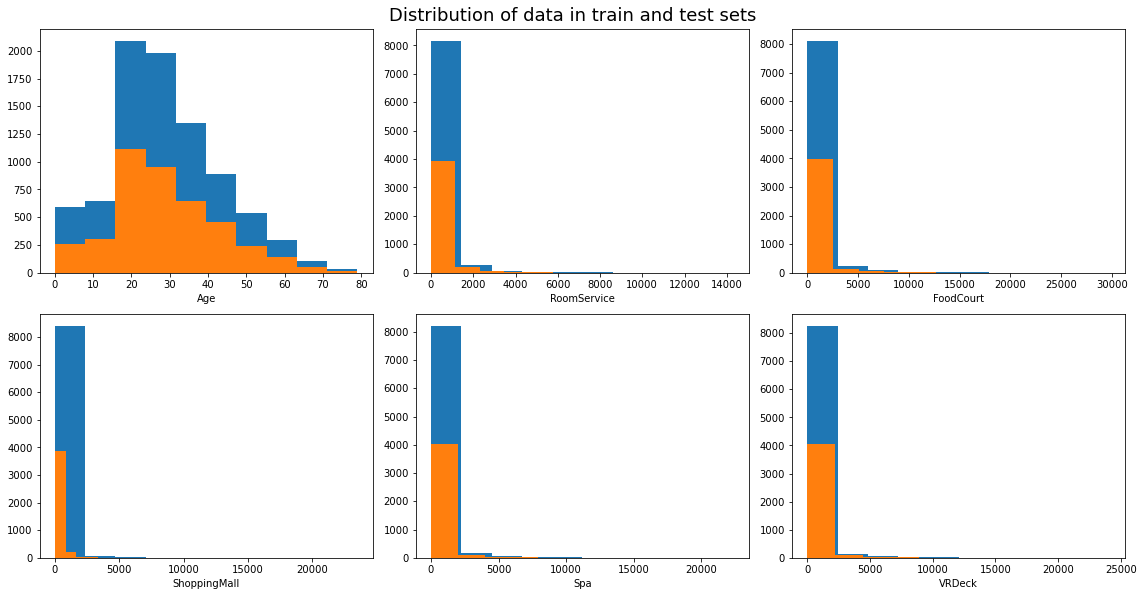

In [55]:

category = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

a = 3
b = 3
c = 1

fig = plt.figure(figsize = (16,12))
plt.suptitle("Distribution of data in train and test sets", fontsize = 18)

for i in category:
    plt.subplot(a, b, c)
    plt.hist(train_df[i])
    plt.hist(test_df[i])
    plt.xlabel(i)
    c = c + 1

plt.tight_layout()
plt.show()

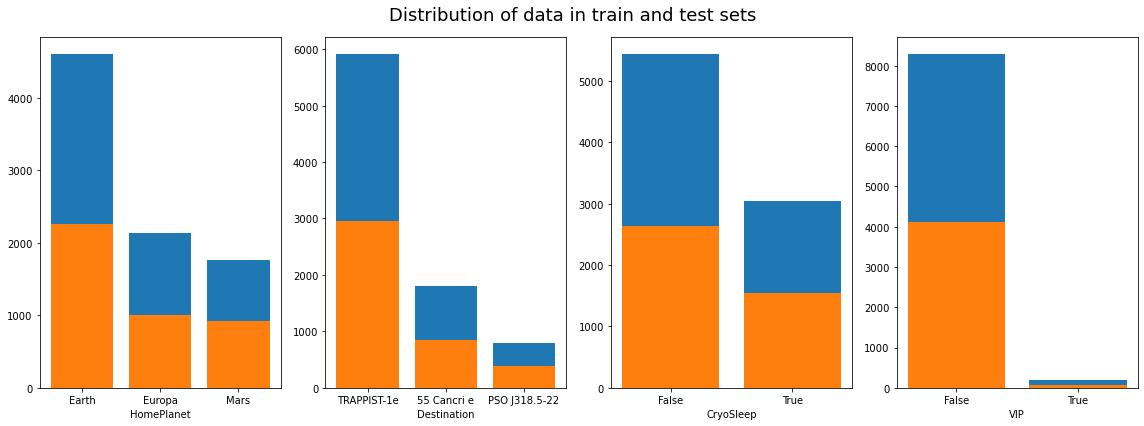

In [50]:
category = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
a = 1  
b = 4  
c = 1 
fig = plt.figure(figsize = (16,6))
plt.suptitle("Distribution of data in train and test sets", fontsize = 18)

for i in category:
    plt.subplot(a, b, c)
    count1 = train_df[i].value_counts() 
    count2 = test_df[i].value_counts()
    plt.bar(list(count1.keys()),count1, tick_label=count1.keys(), label ='train')
    plt.bar(list(count2.keys()),count2, tick_label=count2.keys(), label = 'test')
    plt.xlabel(i)
    c = c + 1

plt.tight_layout()
plt.show()

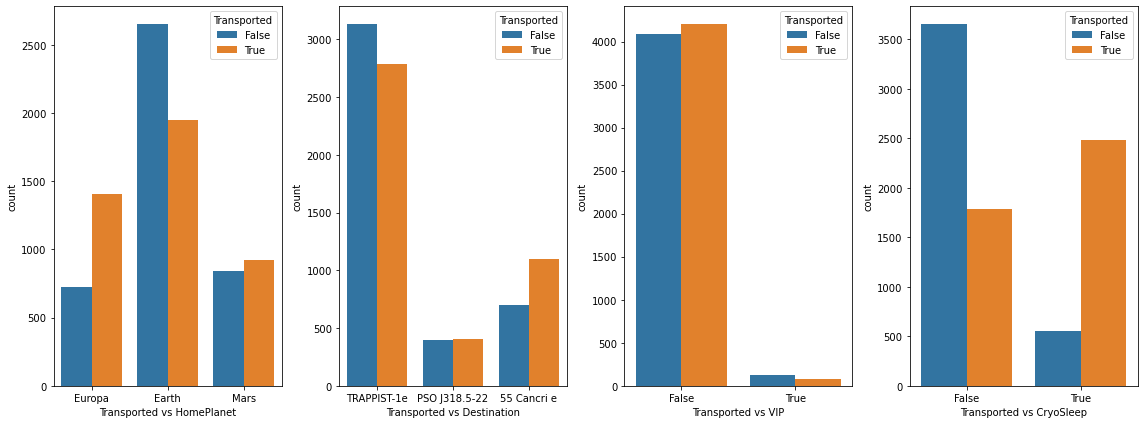

In [68]:
#checking the distribution of transported and non-transported people in particular categories

category = ['HomePlanet','Destination', 'VIP', 'CryoSleep']
a = 1  
b = 4  
c = 1 
fig = plt.figure(figsize = (16,6))

for i in category:
    plt.subplot(a, b, c)
    sns.countplot(x=i,hue="Transported", data=train_df)
    plt.xlabel(f"Transported vs {i}")
    c = c + 1

plt.tight_layout()
plt.show()

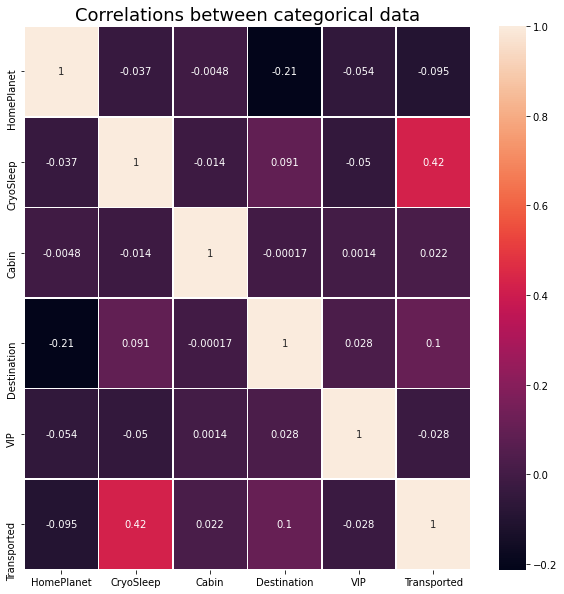

In [62]:
train_cat = train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Transported']]
train_fct=train_cat.apply(lambda x : pd.factorize(x)[0])
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlations between categorical data", fontsize = 18)
sns.heatmap(train_fct.corr(), annot=True, linewidth=.5)
plt.show()

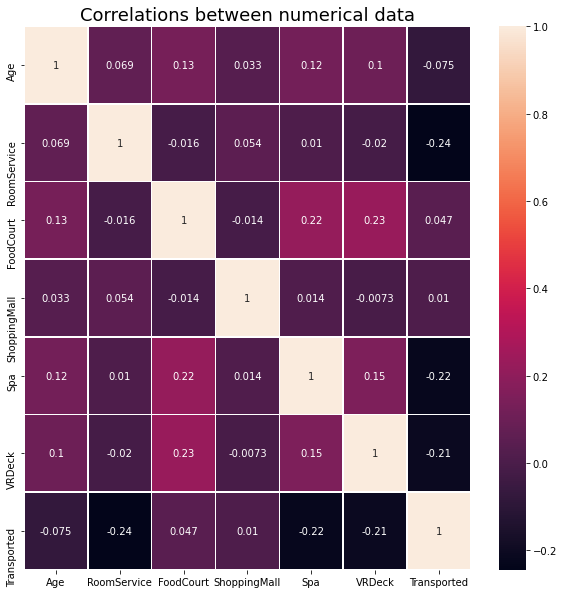

In [63]:
fig, ax = plt.subplots(figsize=(10,10))   
plt.title("Correlations between numerical data", fontsize = 18)
sns.heatmap(train_df.corr(), annot=True, linewidth=.5)
plt.show()

In [18]:
#creating html report
profile = ProfileReport(train_df, title='Spaceship Titanic')
profile.to_widgets()
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
print("Train shape: ",train_df.shape,"Test shape:",test_df.shape)

Train shape:  (8693, 14) Test shape: (4277, 13)


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [21]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [22]:
for i in train_cat:
    print(train_df[[i]].value_counts())
    print('-------------------------------')

HomePlanet
Earth         4602
Europa        2131
Mars          1759
dtype: int64
-------------------------------
CryoSleep
False        5439
True         3037
dtype: int64
-------------------------------
Cabin   
G/734/S     8
C/21/P      7
G/1368/P    7
B/82/S      7
G/981/S     7
           ..
F/1245/P    1
F/1244/S    1
F/1243/S    1
F/1243/P    1
T/3/P       1
Length: 6560, dtype: int64
-------------------------------
Destination  
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
dtype: int64
-------------------------------
VIP  
False    8291
True      199
dtype: int64
-------------------------------
Transported
True           4378
False          4315
dtype: int64
-------------------------------


In [23]:
train_df['Transported'].value_counts() #balanced

True     4378
False    4315
Name: Transported, dtype: int64

In [24]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64